## Install Dependencies and Setup

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Exploring the Data

In [361]:
df = pd.read_csv('titanic.csv')

In [362]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [363]:
df.shape

(891, 12)

In [364]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [366]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Cleaning the Data 

In [367]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [368]:
df.drop('PassengerId',axis=1,inplace=True)

In [369]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [370]:
df.dropna(inplace=True)

In [392]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

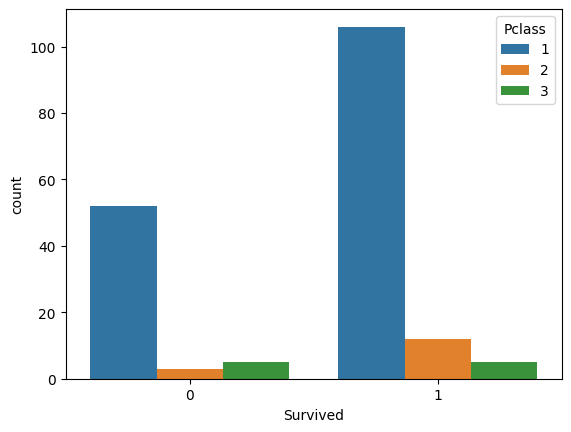

In [390]:
sns.countplot(x='Survived',data=df,hue='Pclass')

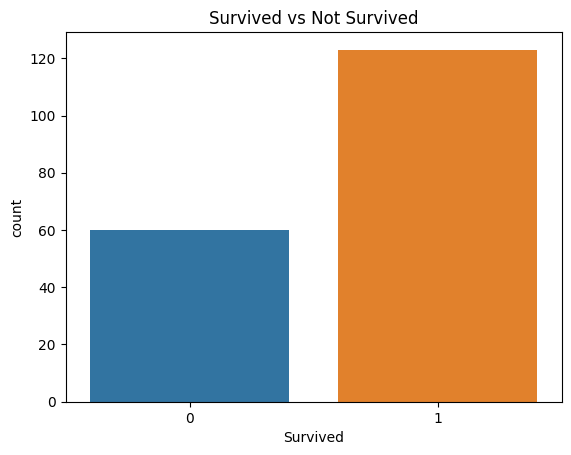

In [371]:
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

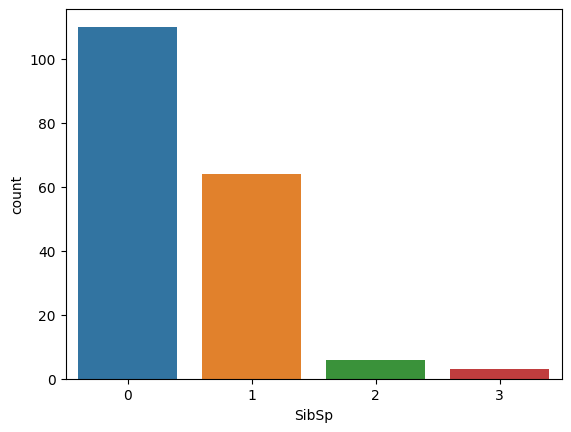

In [391]:
sns.countplot(x='SibSp',data=df)

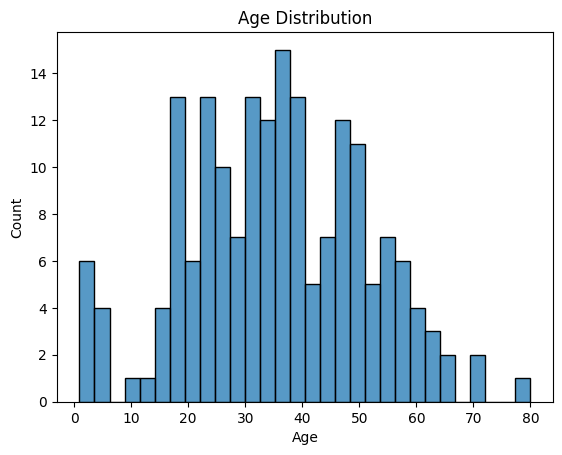

In [372]:
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')
plt.show()

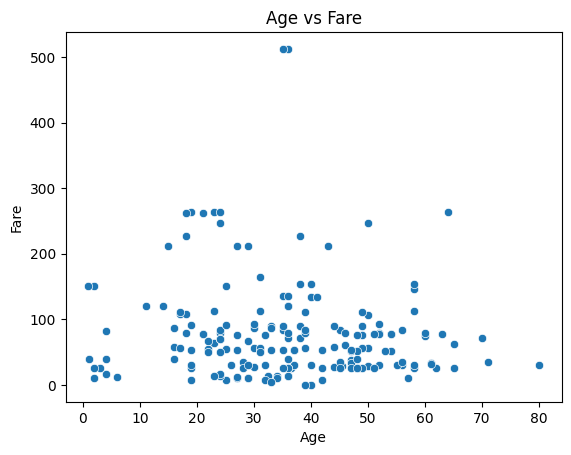

In [373]:
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Age vs Fare')
plt.show()

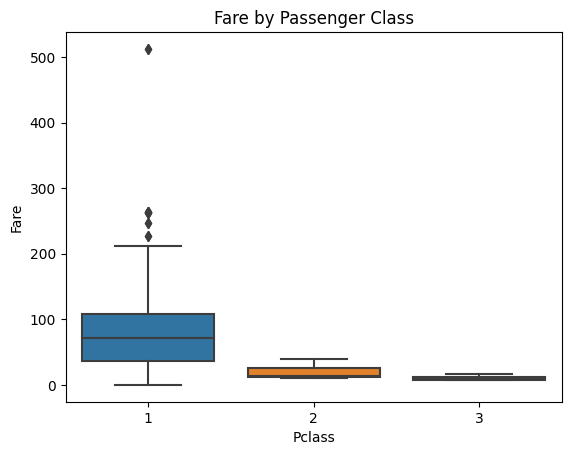

In [374]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare by Passenger Class')
plt.show()

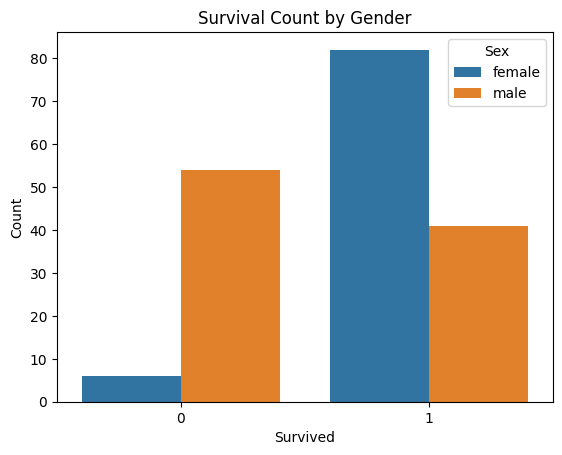

In [375]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(title='Sex', loc='upper right')
plt.show()

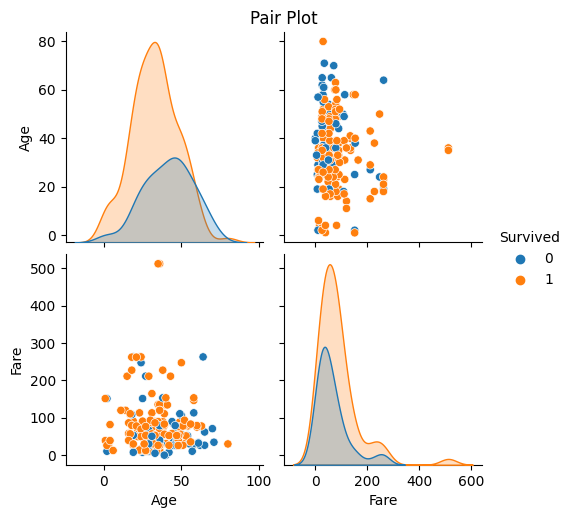

In [376]:
pairplot = sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
pairplot.fig.suptitle('Pair Plot', y=1.02)
plt.show()

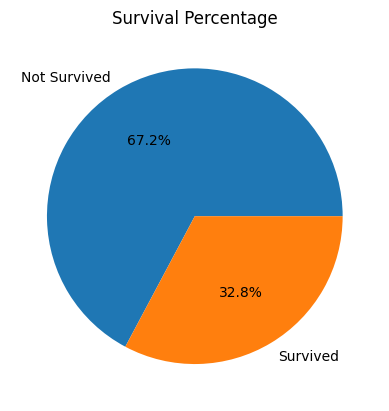

In [377]:
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.show()

## Train and build Classifier

In [378]:
X=df[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
Y=df['Survived']
X=pd.get_dummies(X,drop_first=True)

In [379]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [380]:
model = LogisticRegression()

In [381]:
model.fit(X_train,Y_train)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [382]:
scores = cross_val_score(model, X_train, Y_train, cv=5)
print(scores)

[0.7        0.86206897 0.68965517 0.75862069 0.68965517]


C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [383]:
Y_pred=model.predict(X_test)

## MAE, RMSE, Accuracy 

In [384]:
mae=mean_absolute_error(Y_test,Y_pred)
print('Mean_Absolute_Error:',mae)

Mean_Absolute_Error: 0.2702702702702703


In [385]:
rmse=np.sqrt(mean_absolute_error(Y_test,Y_pred))
print('Root_Mean_Squared_Error:',rmse)

Root_Mean_Squared_Error: 0.5198752449100363


In [386]:
accuracy=model.score(X_test,Y_test)
accuracy_percent=accuracy*100
formatted_accuracy = "{:.2f}%".format(accuracy_percent)
print("Accuracy:", formatted_accuracy)

Accuracy: 72.97%
